# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from math import tan, cos, sin, pi
from pprint import pprint
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import interpolate
from scipy.integrate import quad
import bisect

eps = sys.float_info.epsilon

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
def f1(x):
  return cos(3*x)

def f2(x):
  return x**3 + 3*x**2 - 6*x - 8

def fourier(f, m, T, x):
  # f - origin function
  # m - harmonic quantity
  # T - period
  # n = 2*m + 1
  n = len(x)
  w = 2*pi / T
  nx = np.linspace(x[0], x[-1], n)
  # print(n, len(x))
  a = lambda k: 2/n * sum([f(i) * cos(k*w*i) for i in nx])
  b = lambda k: 2/n * sum([f(i) * sin(k*w*i) for i in nx])
  hy = lambda t: (a(0) / 2) + sum([a(k) * cos(k*w*t) + b(k) * sin(k*w*t) for k in range(1, m + 1)])

  y = [hy(t) for t in x] # fourier
  e = [(hy(t) - f(t)) / f(t) for t in x] # error
  Q = (1/n * sum([(hy(t) - f(t))**2 for t in x])) ** .5 # dispersion
  A = [(a(t)**2 + b(t)**2)**.5 for t in x]
  alpha = [b(t)**2 / a(t)**2 for t in x]
  wk = [t*w for t in x]

  # y_ = [f(t) for t in x]
  # plt.plot(x, y_, x, y)

  return y, e, Q, a, b, A, alpha, wk

def task1(f, T, x, m_min=1, m_max=100):
  ms = [m for m in range(m_min, m_max + 1)]
  Qs = [fourier(f, m, T, x)[2] for m in ms]
  plt.plot(ms, Qs, label=f'Q(m), m_min:{m_min} m_max:{m_max}')

def task2(fper, faper, m, T, x):
  yper = [fper(i) for i in x]
  yaper = [faper(i) for i in x]
  yperf = fourier(fper, m, T, x)[0]
  yaperf = fourier(faper, m, T, x)[0]
  diffper = [abs(yper[i] - yperf[i]) for i in range(len(x))]
  diffaper = [abs(yaper[i] - yaperf[i]) for i in range(len(x))]
  diff = [diffaper[i] - diffper[i] for i in range(len(x))] # if > 0 than periodic has less error
  plt.plot(x, diff, label=f'diff')

def task3(fs, m, T, x):
  # fs = [f1, f2]
  signals = [quad(lambda t: f(t)**2, -np.inf, np.inf)[0] for f in fs]
  for i, signal in enumerate(signals):
    print(f'Function #{i + 1}. Signal: {signal}')

def task4(f, m, T, x):
  y, e, Q, ak, bk, Ak, alpha, wk = fourier(f, m, T, x)
  # print('k' + ' '*12 + 'ak' + ' '*12 + 'bk' + ' '*12 + 'Ak' + ' '*12 + 'wk')
  print('k', 'ak', 'bk', 'Ak', 'wk', sep=' '*13)
  for i in range(len(x)):
    print(f'{x[i]: <.10}\t{ak(x[i]): <.10}\t{bk(x[i]): <.10}\t{Ak[i]: <.10}\t{wk[i]: <.10}')

# Task

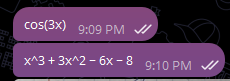

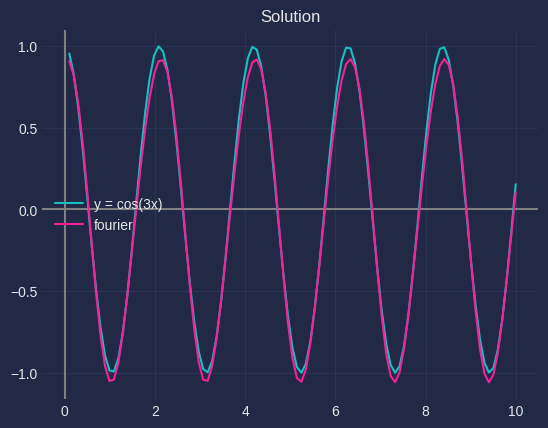

In [ ]:
x = np.linspace(.1, 10, 101)
# x = np.linspace(0, 10, 3)
y1 = [f1(i) for i in x]
y2 = fourier(f1, 2, 2*pi / 3, x)[0]

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Solution')
plt.plot(x, y1, label='y = cos(3x)')
plt.plot(x, y2, label='fourier')
ax.legend()

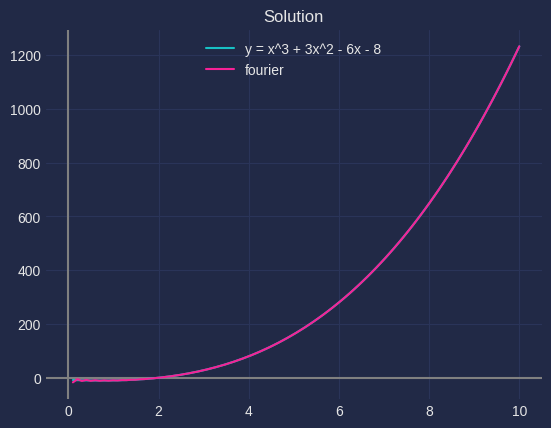

In [ ]:
# n = 2*m + 1 => than linspace num should be twice more than other one
x = np.linspace(.1, 10, 101)
y1 = [f2(i) for i in x]
y2 = fourier(f2, 50, 10, x)[0]

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Solution')
plt.plot(x, y1, label='y = x^3 + 3x^2 - 6x - 8')
plt.plot(x, y2, label='fourier')
ax.legend()

<ipython-input-51-0c2c357c729b>:21: RuntimeWarning: divide by zero encountered in scalar divide
  e = [(hy(t) - f(t)) / f(t) for t in x] # error


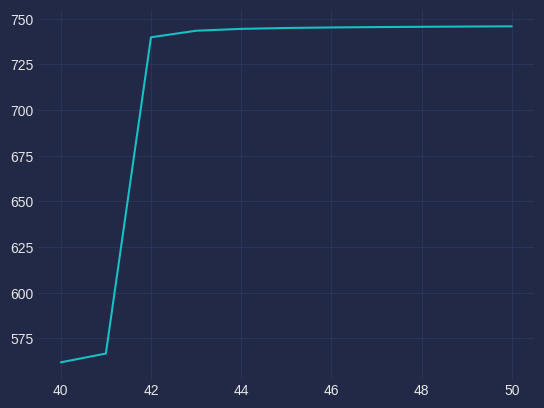

In [ ]:
x = np.linspace(0, 10, 101)
task1(f2, 2*pi/3, x, 40, 50)

<ipython-input-51-0c2c357c729b>:21: RuntimeWarning: divide by zero encountered in scalar divide
  e = [(hy(t) - f(t)) / f(t) for t in x] # error


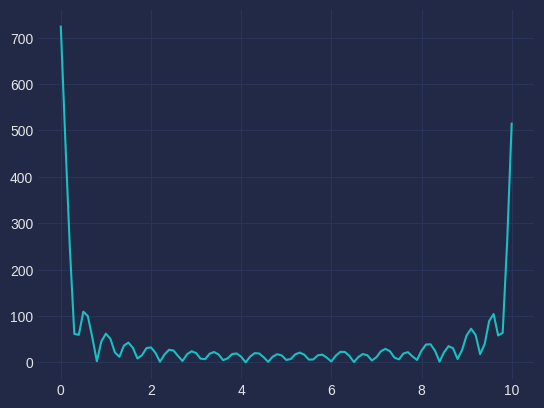

In [ ]:
x = np.linspace(0, 10, 101)
task2(f1, f2, 10, 10, x)

In [ ]:
x = np.linspace(0, 10, 101)
task3([f1, f2], 10, 10, x)

Function #1. Signal: 7495.7560514655515
Function #2. Signal: 1.757839973448331e+55


<ipython-input-13-69828d76a7dd>:48: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  signals = [quad(lambda t: f(t)**2, -np.inf, np.inf)[0] for f in fs]
<ipython-input-13-69828d76a7dd>:48: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  signals = [quad(lambda t: f(t)**2, -np.inf, np.inf)[0] for f in fs]


In [ ]:
x = np.linspace(0, 10, 21)
task4(f1, 5, 5, x)

k             ak             bk             Ak             wk
0.0	0.004460593762	0.0	0.004460593762	0.0
0.5	0.001652714891	-0.01413722274	0.01423350039	0.6283185307
1.0	-0.008604046725	-0.03206414552	0.03319847961	1.256637061
1.5	-0.03580335283	-0.06301569155	0.07247659937	1.884955592
2.0	-0.1419942951	-0.1607463347	0.2144802182	2.513274123
2.5	0.7184238239	0.5693431396	0.9166702795	3.141592654
3.0	0.1785476272	0.1008615671	0.2050666011	3.769911184
3.5	0.126231881	0.04947764542	0.1355821713	4.398229715
4.0	0.1083102399	0.02690786906	0.1116026052	5.026548246
4.5	0.1008946296	0.01217982653	0.1016271344	5.654866776
5.0	0.09879515301	-1.568715858e-15	0.09879515301	6.283185307
5.5	0.1008946296	-0.01217982653	0.1016271344	6.911503838
6.0	0.1083102399	-0.02690786906	0.1116026052	7.539822369
6.5	0.126231881	-0.04947764542	0.1355821713	8.168140899
7.0	0.1785476272	-0.1008615671	0.2050666011	8.79645943
7.5	0.7184238239	-0.5693431396	0.9166702795	9.424777961
8.0	-0.1419942951	0.1607463347	0.21448

In [ ]:
def f1(x):
  return cos(3*x)

def f2(x):
  return x**3 + 3*x**2 - 6*x - 8

def fourier(f, m, T, x):
  # f - origin function
  # m - harmonic quantity
  # T - period
  n = 2*m + 1
  # n = len(x)
  w = 2*pi / T
  # print(n, len(x))
  a = lambda k: 2/n * sum([f(x[i]) * cos(k*w*x[i]) for i in range(n)])
  b = lambda k: 2/n * sum([f(x[i]) * sin(k*w*x[i]) for i in range(n)])
  hy = lambda t: (a(0) / 2) + sum([a(k) * cos(k*w*t) + b(k) * sin(k*w*t) for k in range(1, m + 1)])

  y = [hy(t) for t in x] # fourier
  e = [(hy(t) - f(t)) / f(t) for t in x] # error
  Q = (1/n * sum([(hy(t) - f(t))**2 for t in x])) ** .5 # dispersion
  A = [(a(t)**2 + b(t)**2)**.5 for t in x]
  alpha = [b(t)**2 / a(t)**2 for t in x]
  wk = [t*w for t in x]

  # y_ = [f(t) for t in x]
  # plt.plot(x, y_, x, y)

  return y, e, Q, a, b, A, alpha, wk

def task1(f, T, x, m_min=1, m_max=100):
  ms = [m for m in range(m_min, m_max + 1)]
  Qs = [fourier(f, m, T, x)[2] for m in ms]
  plt.plot(ms, Qs, label=f'Q(m), m_min:{m_min} m_max:{m_max}')

def task2(fper, faper, m, T, x):
  yper = [fper(i) for i in x]
  yaper = [faper(i) for i in x]
  yperf = fourier(fper, m, T, x)[0]
  yaperf = fourier(faper, m, T, x)[0]
  diffper = [abs(yper[i] - yperf[i]) for i in range(len(x))]
  diffaper = [abs(yaper[i] - yaperf[i]) for i in range(len(x))]
  diff = [diffaper[i] - diffper[i] for i in range(len(x))] # if > 0 than periodic has less error
  plt.plot(x, diff, label=f'diff')

def task3(fs, m, T, x):
  # fs = [f1, f2]
  signals = [quad(lambda t: f(t)**2, -np.inf, np.inf)[0] for f in fs]
  for i, signal in enumerate(signals):
    print(f'Function #{i + 1}. Signal: {signal}')

def task4(f, m, T, x):
  y, e, Q, ak, bk, Ak, alpha, wk = fourier(f, m, T, x)
  # print('k' + ' '*12 + 'ak' + ' '*12 + 'bk' + ' '*12 + 'Ak' + ' '*12 + 'wk')
  print('k', 'ak', 'bk', 'Ak', 'wk', sep=' '*13)
  for i in range(len(x)):
    print(f'{x[i]: <.10}\t{ak(x[i]): <.10}\t{bk(x[i]): <.10}\t{Ak[i]: <.10}\t{wk[i]: <.10}')

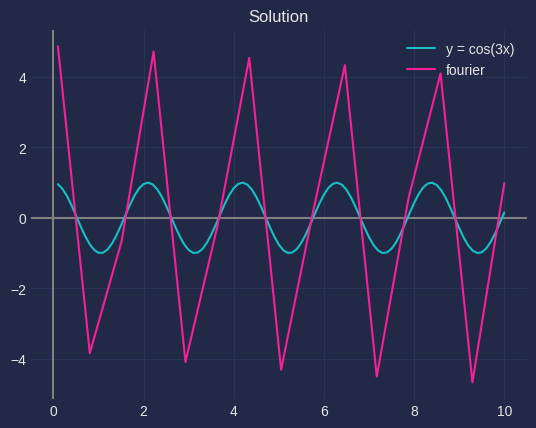

In [ ]:
def f1(x):
  return cos(3*x)

def f2(x):
  return x**3 + 3*x**2 - 6*x - 8

def fourier(f, m, T, start, stop, num):
  # f - origin function
  # m - harmonic quantity
  # T - period
  n = 2*m + 1
  # n = len(x)
  w = 2*pi / T
  # print(n, len(x))
  x = np.linspace(start, stop, n)
  a = lambda k: 2/n * sum([f(i) * cos(k*w*i) for i in x])
  b = lambda k: 2/n * sum([f(i) * sin(k*w*i) for i in x])
  hy = lambda t: (a(0) / 2) + sum([a(k) * cos(k*w*t) + b(k) * sin(k*w*t) for k in range(1, m + 1)])
  x = np.linspace(start, stop, num)
  y = [hy(t) for t in x] # fourier
  e = [(hy(t) - f(t)) / f(t) for t in x] # error
  Q = (1/n * sum([(hy(t) - f(t))**2 for t in x])) ** .5 # dispersion
  A = [(a(t)**2 + b(t)**2)**.5 for t in x]
  alpha = [b(t)**2 / a(t)**2 for t in x]
  wk = [t*w for t in x]

  # y_ = [f(t) for t in x]
  # plt.plot(x, y_, x, y)

  return x, y, e, Q, a, b, A, alpha, wk

def task1(f, T, x, m_min=1, m_max=100):
  ms = [m for m in range(m_min, m_max + 1)]
  Qs = [fourier(f, m, T, x)[2] for m in ms]
  plt.plot(ms, Qs, label=f'Q(m), m_min:{m_min} m_max:{m_max}')

def task2(fper, faper, m, T, x):
  yper = [fper(i) for i in x]
  yaper = [faper(i) for i in x]
  yperf = fourier(fper, m, T, x)[0]
  yaperf = fourier(faper, m, T, x)[0]
  diffper = [abs(yper[i] - yperf[i]) for i in range(len(x))]
  diffaper = [abs(yaper[i] - yaperf[i]) for i in range(len(x))]
  diff = [diffaper[i] - diffper[i] for i in range(len(x))] # if > 0 than periodic has less error
  plt.plot(x, diff, label=f'diff')

def task3(fs, m, T, x):
  # fs = [f1, f2]
  signals = [quad(lambda t: f(t)**2, -np.inf, np.inf)[0] for f in fs]
  for i, signal in enumerate(signals):
    print(f'Function #{i + 1}. Signal: {signal}')

def task4(f, m, T, x):
  y, e, Q, ak, bk, Ak, alpha, wk = fourier(f, m, T, x)
  # print('k' + ' '*12 + 'ak' + ' '*12 + 'bk' + ' '*12 + 'Ak' + ' '*12 + 'wk')
  print('k', 'ak', 'bk', 'Ak', 'wk', sep=' '*13)
  for i in range(len(x)):
    print(f'{x[i]: <.10}\t{ak(x[i]): <.10}\t{bk(x[i]): <.10}\t{Ak[i]: <.10}\t{wk[i]: <.10}')

start = .1
stop = 10
x1 = np.linspace(start, stop, 100)
y1 = [f1(i) for i in x1]
x2, y2 = fourier(f1, 1, 2*pi / 3, start, stop, 15)[:2]

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Solution')
plt.plot(x1, y1, label='y = cos(3x)')
plt.plot(x2, y2, label='fourier')
ax.legend()